In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/Users/leasaab/Documents/Dev/AX3-Project/data/FemmeCardio.csv"

data = pd.read_csv(file_path)

timestamp_column = data.columns[0]
signal_columns = data.columns[1:]   # All remaining columns are sensor data

# Convert the timestamp column to datetime
data[timestamp_column] = pd.to_datetime(data[timestamp_column], errors='coerce')  # Handle invalid dates

# Calculate the sampling interval (in seconds)
sampling_interval = (
    pd.to_datetime(data[timestamp_column].iloc[1]) -  # Access a single row
    pd.to_datetime(data[timestamp_column].iloc[0])
).total_seconds()

# Create a relative time axis (in minutes)
data['relative_time_seconds'] = data.index * sampling_interval

# Define axis labels for clarity
axis_labels = ['X', 'Y', 'Z']
colors = {'X': 'blue', 'Y': 'red', 'Z': 'green'}  # Define colors for each signal

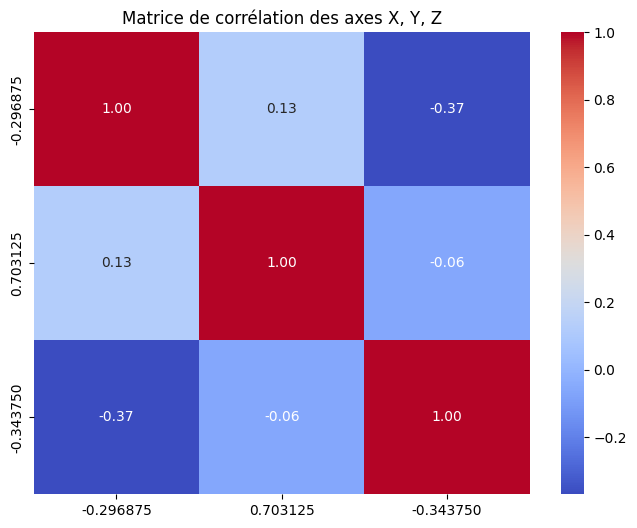

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de corrélation entre les axes
correlation_matrix = data[signal_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Matrice de corrélation des axes X, Y, Z")
plt.show()

Dans la matrice de corrélation : l’axe Z a des corrélations faibles avec X et Y (-0.37 et -0.06 respectivement), ce qui est cohérent avec un axe dominant des mouvements verticaux indépendants. Les axes X et Y sont faiblement liés, ce qui suggère qu’ils mesurent des directions secondaires ou moins pertinentes dans cette activité.